# Support Vector Machine Algorithm in Machine Learning 🤖

As you go along you'll get to know:

- Linear SVM
- How to plot decision boundary
- SVCs with Kernels
- Kernel Approximation

And the first thing that we're going to want to do is import the necessary libraries as we've done before.

## Import Libraries 📦

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load and Examine the Dataset 📄

Here we're going to be using the `Wine_Quality_Data.csv` dataset.

This data set contains various chemical properties of wine, such as `acidity`, `sugar`, `pH`, and `alcohol`. It also contains a `quality` metric (3-9, with the highest being better) and a `color` (red or white).

In [3]:
data = pd.read_csv('../datasets/Wine_Quality_Data.csv', sep=',')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# to see how many entries or observation the dataset contains you can simply print its shape
print(data.shape)

(6497, 13)


### Create a Pair Plot

We're now going to create a pair plot for the dataset to see if there's some type of separation in the data in regards to our `red` wine and our `white` wine, that pair plot's going to be the relationships between the variables and our outcome variable as well as each of the variables with the other variables in our dataset.

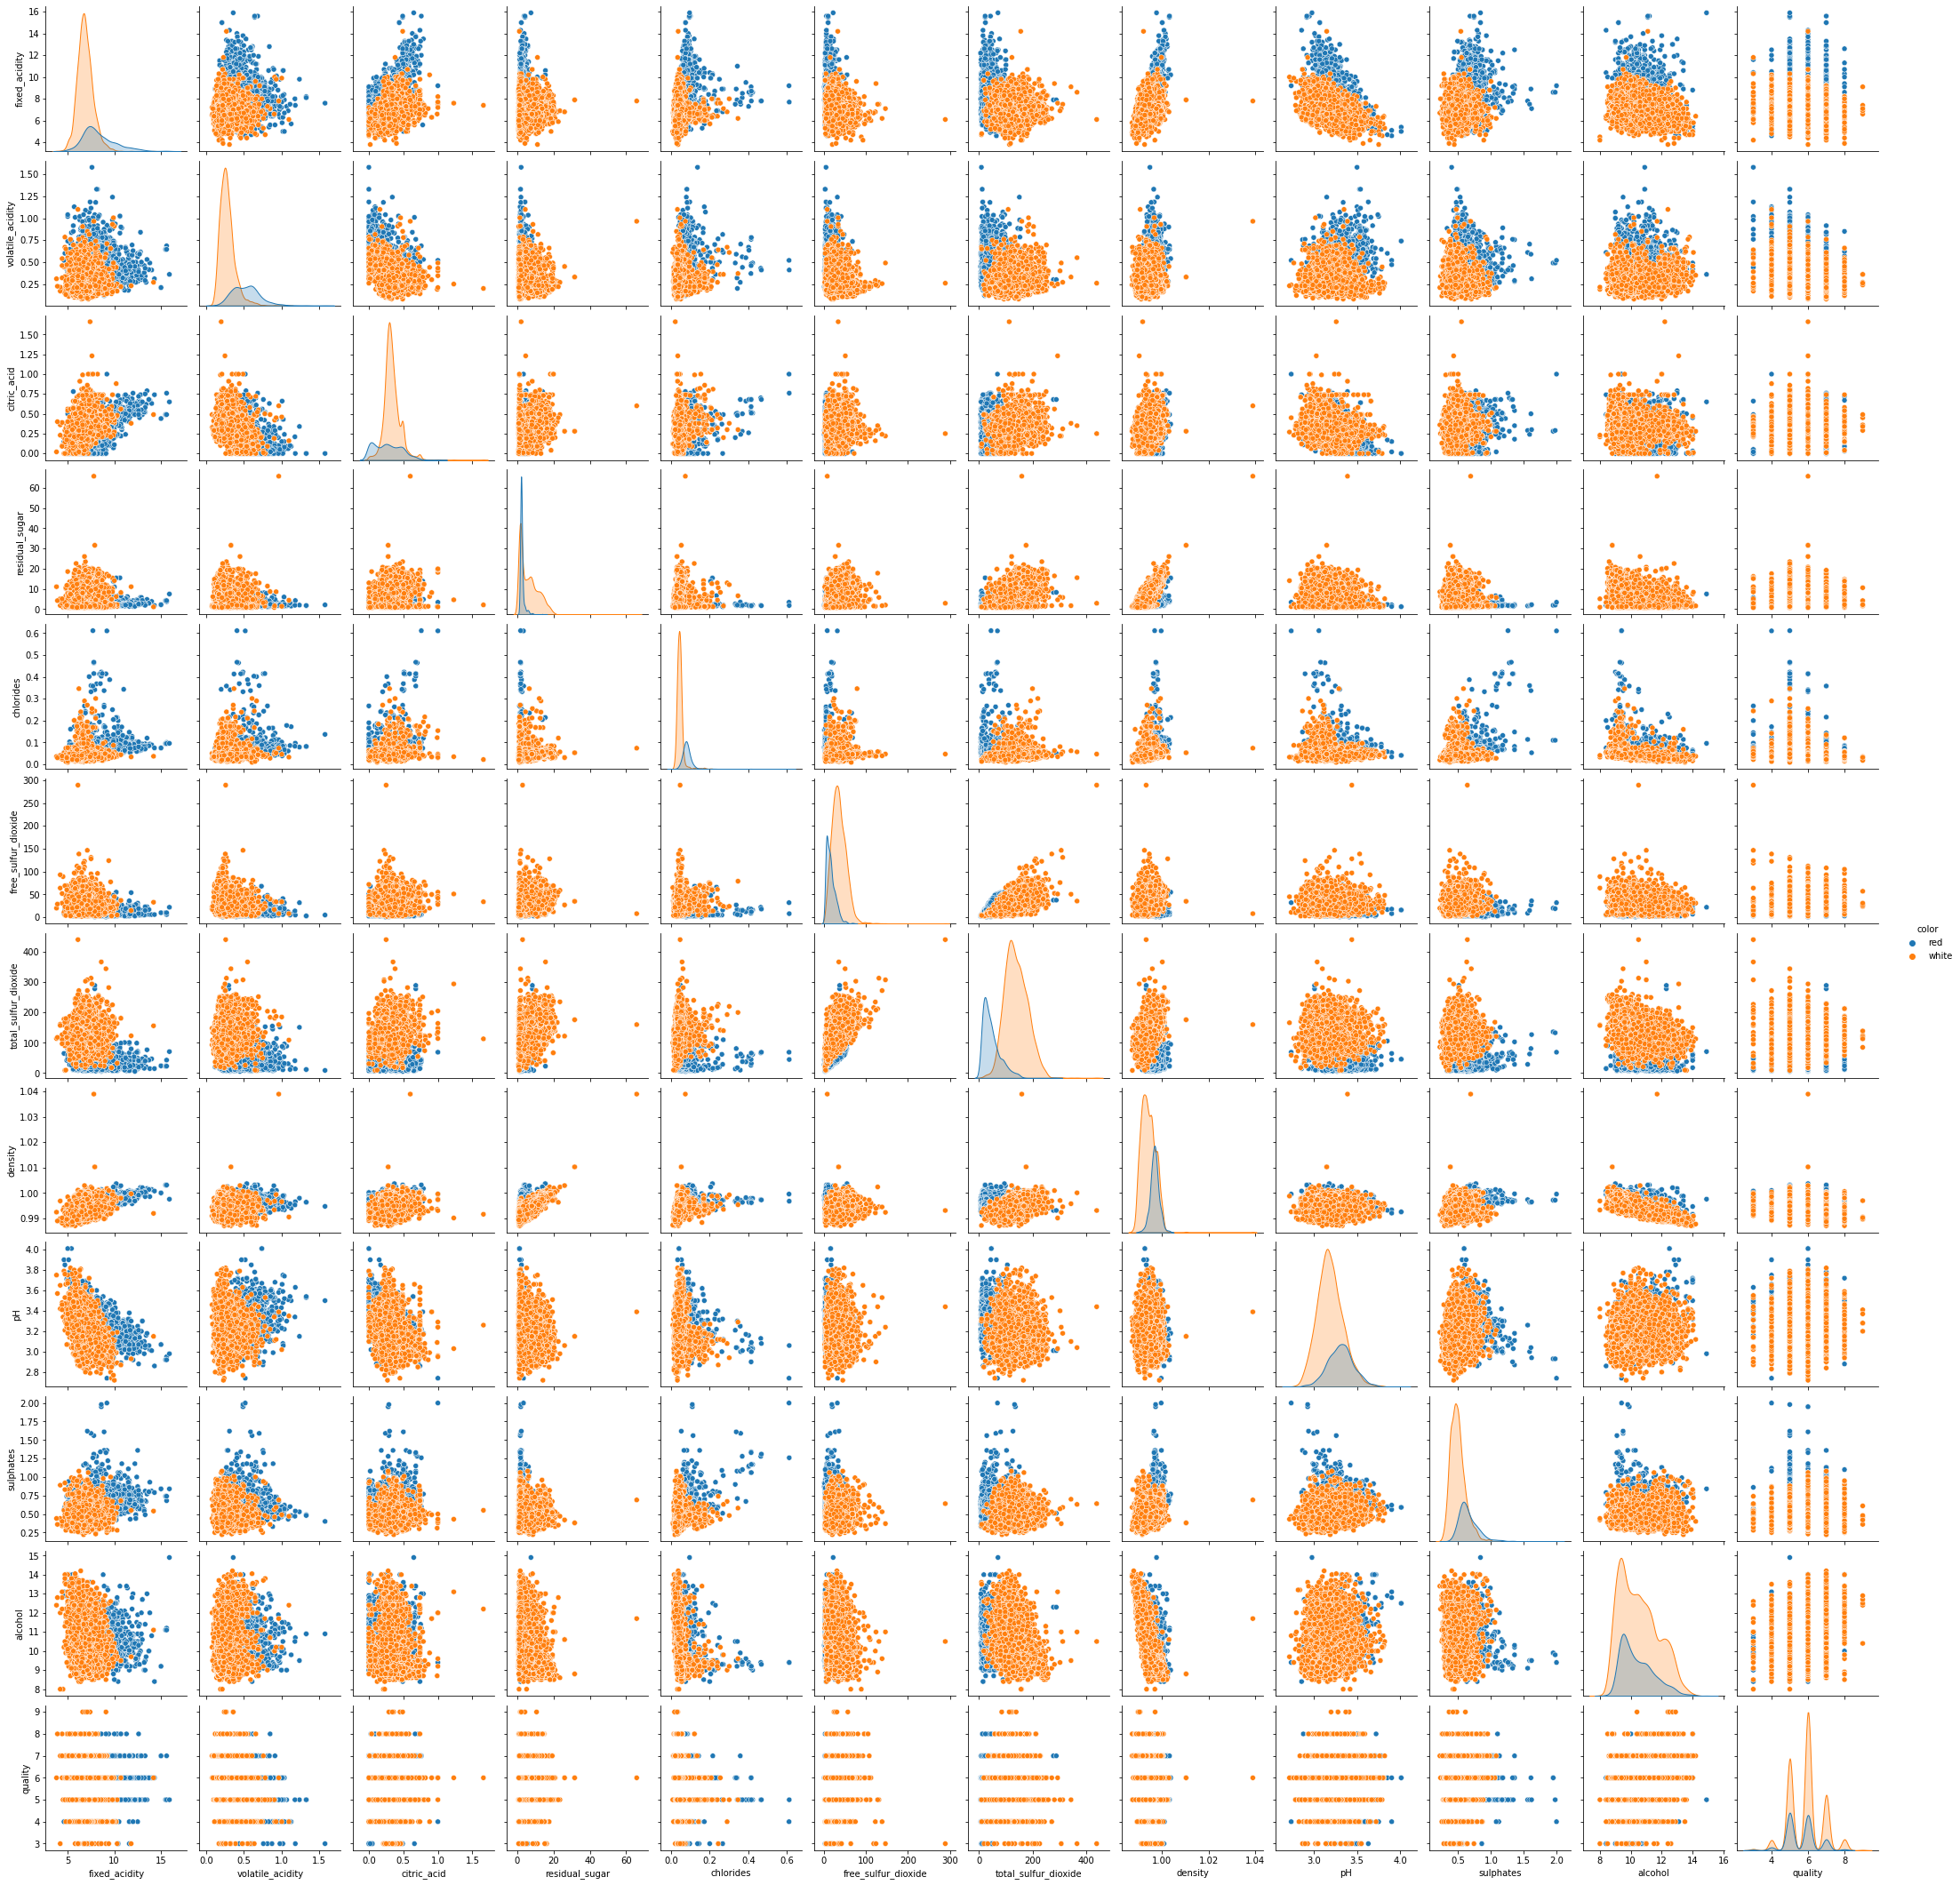

In [5]:
sns.pairplot(data, hue='color')

We see from the scatter plots that there seems to be some type of separation in the data in regards to our `red` wine and our `white` wine. Hopefully, that means that we'll be able to come up with a classifier that clearly identifies which wines are `red` and which wines are `white`.

## Extract Feature and Target Data 🤌

Create our target variable `y`, that's going to be either `red` or `white`, that's what we're trying to predict using all of our variables, and we want to set that to `1` and `0` where `1` is `red`.

In [6]:
y = (data['color'] == 'red').astype(int)
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

We'll create a new `X` with only two features, this is just for visual purposes, it's easier to plot when we're only working in two dimensions. We're going to pick the two most correlated fields.

In [7]:
# get correlations between each column
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [8]:
# get the two most correlated fields
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


These are the two columns that we're going to use moving forward so that we can easily visualize our classifier. As once we move beyond two dimensions, it gets a little bit more difficult to visualize our classification.

## Feature Scaling ⚖️

Similar to k-nearest neighbors, the distance is going to matter when we're trying to figure out what is the best margin, and we don't want any one of our features to have more weight than the others.

So if the features range from 0-5 vs 10,000 to a million, we don't want that to have an effect, but rather the variation within those values to have that effect.

That’s why we need to scale them so that they're on the same scale. That's going to be very important for any of our support vector machines.

In [9]:
# import the class containing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# create an instance of the class
mm = MinMaxScaler()

In [10]:
X = mm.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Linear Decision Boundary 🧱

Let's look at the decision boundary of a `LinearSVC` classifier using our data set.

In [11]:
# initiate linear support vector machine classifier
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

Now we're going to fit a linear support vector machine classifier using our `X` with just two dimensions and our `y`.

In [12]:
LSVC.fit(X, y)

LinearSVC()

We're going to pick 300 samples from our `X` and get the corresponding `y` values for each one of those 300 samples and store them in variables `X_color` and `y_color`, and this is because our original data sets could be too large when we actually want to plot this out within our two-dimensional frame.

In [13]:
X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]

Modify `y_color` so that's `red` instead of `1`, and `yellow` instead of `0`, this allows us to also color-code our graphs, and have a scatter plot of our `X_color` columns.

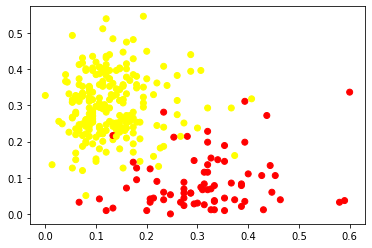

In [14]:
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)

We just have the scatter plot without our line that would be separating those two out.

To come up with a linear separator on this plot, let's create a contour plot that will show, given each one of our two variables, what is going to be our prediction.

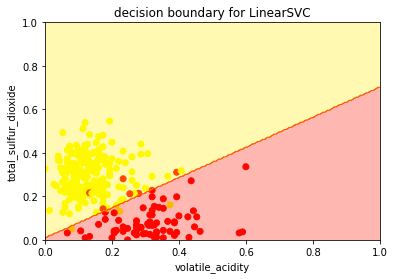

In [15]:
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

Let’s wrap this inside a function so that we can pass in different SVC models with different gammas and different Cs.

In [16]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

## SVCs with Kernels 🌽

Let's now fit SVCs with Kernels and see how the decision boundary changes.

We're also going to loop through hyper-parameters(the `gammas`, and the `C`s) so that we can visualize what the effect of **regularization** is when we increase or decrease our `gammas` and when we increase or decrease our values for `C`.

Let’s create a SVC with **Radial Basis Function** and plot the decision boundary using `gammas` = `[.5, 1, 2, 10]`. You can look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to see what other kernels that are available to us.

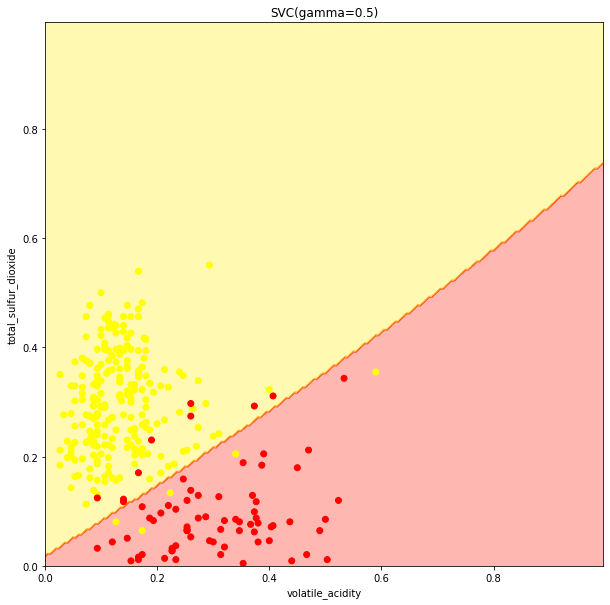

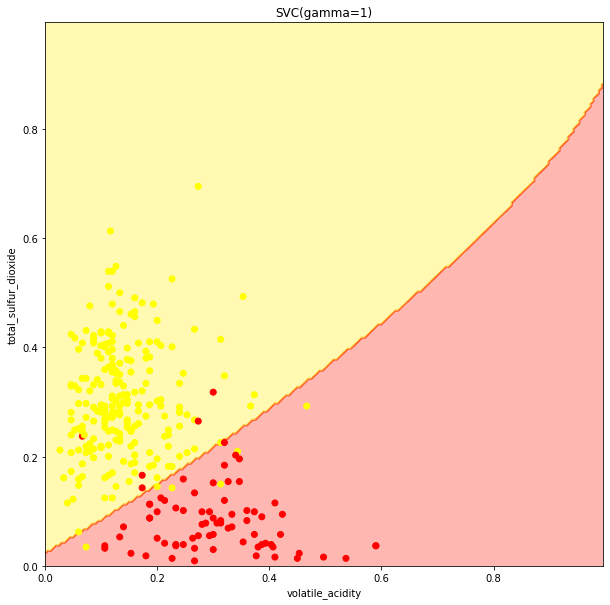

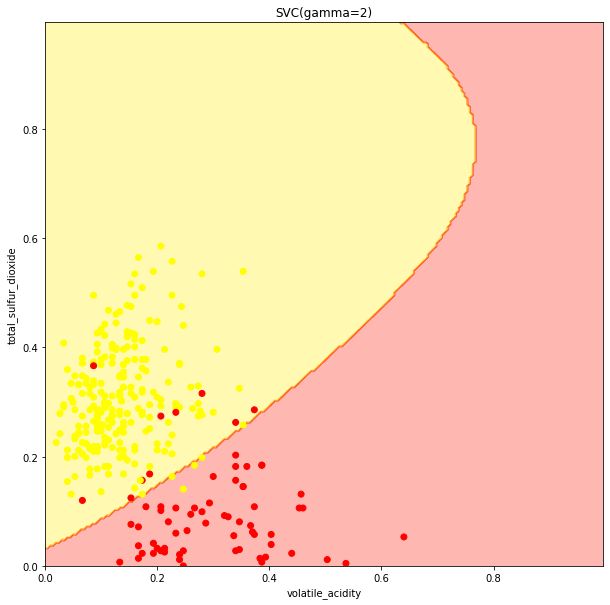

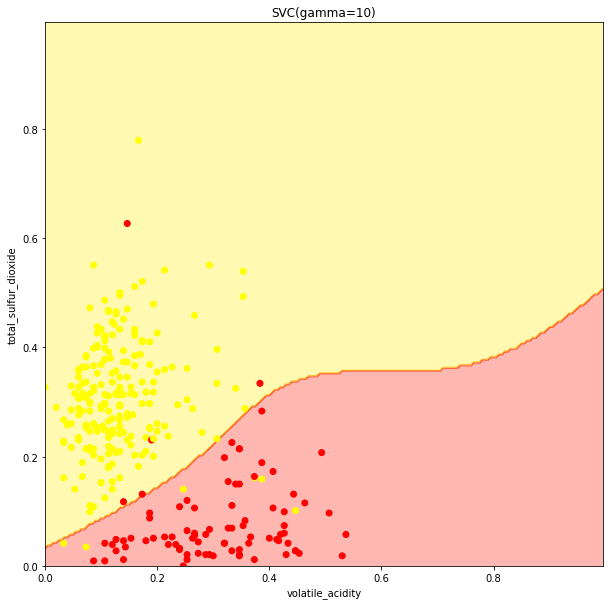

In [17]:
from sklearn.svm import SVC
gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_RBF = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_RBF, X, y)

For a lower value of `gamma`, we’re getting a less complex model that means **higher regularization** and for a higher value of `gamma`, we’re getting a more complex model that means **lower regularization**.

Now let's see the effect of regularization holding `gamma` constant, for various values of `C`: `[.1, 1, 10]`.

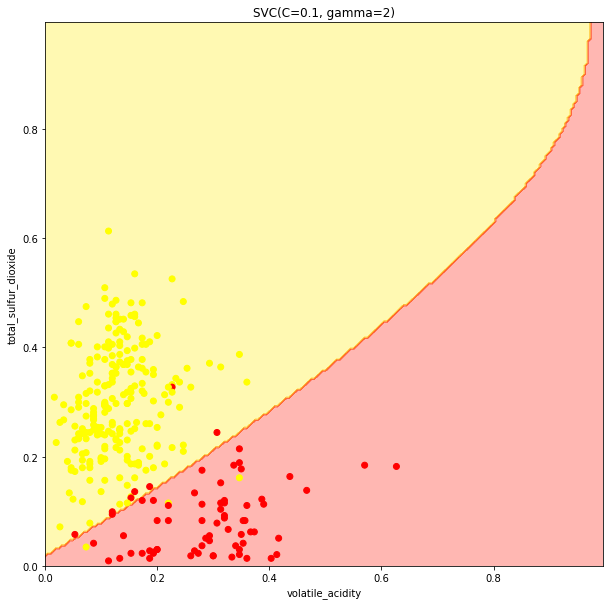

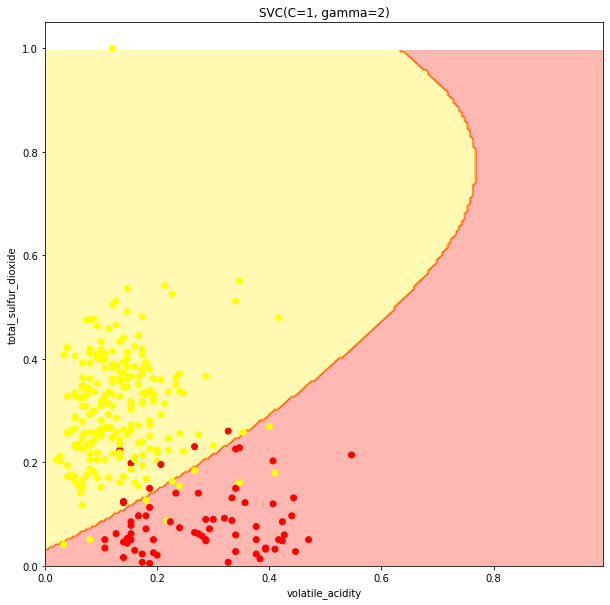

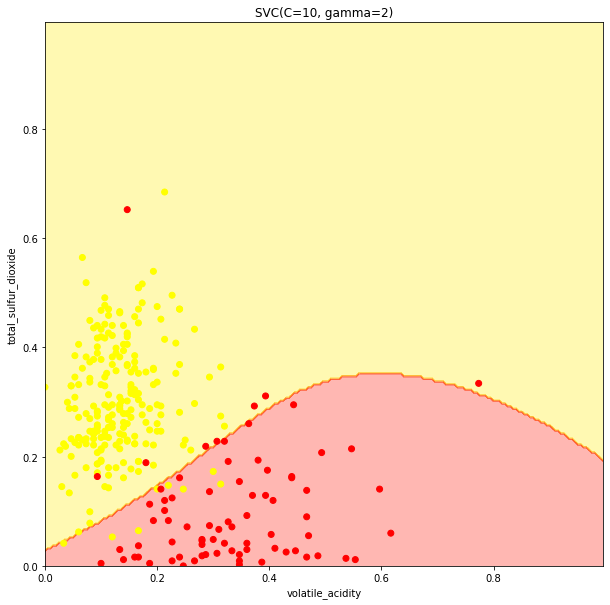

In [18]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_RBF = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_RBF, X, y)

The same holds for `C`. So it's the same **inverse relationship**.

## Kernel Approximation 〰️

Support vector machines with RBF kernels are very slow to train when we have a lot of data. So what we can do is use the kernel map to actually create a dataset in a higher dimensional space using kernel approximations and then do `LinearSVC` or `SGDClassifier`.

A useful magic function `%timeit` which executes a line and prints out the time it took to fit. If we type `%%timeit` at the beginning of the cell, it will output the execution time.

We'll be using **Nystroem Method**, You can look at the documentation to see what other [kernel approximations](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.kernel_approximation) that are available to us.

In [19]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
lsvc = LinearSVC()

In [20]:
%%timeit
svc.fit(X, y)

578 ms ± 78.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
X_transformed = nystroem.fit_transform(X)
lsvc.fit(X_transformed, y)

215 ms ± 57.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


You can see transforming the dataset to a higher dimension and then doing `LinearSVC` is faster, that's why it is recommended to run kernel approximation when we have a huge dataset.